## **LOAD IMAGES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#copy zip from drive to colab
!cp /content/drive/MyDrive/Pneumonia_classification-20210606T120153Z-001.zip /content

#unzip
!unzip /content/Pneumonia_classification-20210606T120153Z-001.zip

#remove zipfile after unzip to reduce harddisk space
!rm /content/Pneumonia_classification-20210606T120153Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0919-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person762_virus_1390.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person74_bacteria_363.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0944-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person721_virus_1340.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0912-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0946-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person75_bacteria_365.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0937-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0942-0001.jpeg  
  inflating: Pneumonia_classification/Data/NORMAL/NORMAL2-IM-0957-0001.jpeg  
  inflating: Pneumonia_classification/Data/PNEUMONIA/person645_virus_1226.jpe

In [ ]:
# check images in colab
import os

normal_image_names=os.listdir('/content/Pneumonia_classification/Data/NORMAL')
pneumonia_image_names=os.listdir('/content/Pneumonia_classification/Data/PNEUMONIA')

print(normal_image_names)
print('Number of normal images',len(normal_image_names))
print(pneumonia_image_names)
print('Number of pneumonia images',len(pneumonia_image_names))

['NORMAL2-IM-0657-0001.jpeg', 'IM-0513-0001.jpeg', 'NORMAL2-IM-0635-0001.jpeg', 'NORMAL2-IM-0851-0001-0001.jpeg', 'NORMAL2-IM-0831-0001.jpeg', 'NORMAL2-IM-0815-0001.jpeg', 'IM-0291-0001.jpeg', 'NORMAL2-IM-0650-0001.jpeg', 'NORMAL2-IM-0507-0001.jpeg', 'IM-0476-0001.jpeg', 'NORMAL2-IM-0637-0001.jpeg', 'IM-0302-0001.jpeg', 'NORMAL2-IM-0946-0001.jpeg', 'IM-0189-0001.jpeg', 'IM-0606-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0718-0001.jpeg', 'NORMAL2-IM-0359-0001.jpeg', 'IM-0733-0001.jpeg', 'NORMAL2-IM-0892-0001.jpeg', 'NORMAL2-IM-0842-0001.jpeg', 'NORMAL2-IM-0536-0001.jpeg', 'IM-0375-0001.jpeg', 'NORMAL2-IM-1205-0001.jpeg', 'NORMAL2-IM-0443-0001.jpeg', 'NORMAL2-IM-0694-0001.jpeg', 'IM-0168-0001.jpeg', 'NORMAL2-IM-0897-0001.jpeg', 'NORMAL2-IM-0509-0001.jpeg', 'NORMAL2-IM-0849-0001.jpeg', 'NORMAL2-IM-0361-0001.jpeg', 'NORMAL2-IM-0686-0001.jpeg', 'NORMAL2-IM-1286-0001.jpeg', 'NORMAL2-IM-1047-0001.jpeg', 'IM-0608-0001-0001.jpeg', 'IM-0717-0001.jpeg', 'IM-0430-0001.jpeg', 'NORMAL2-IM-0406-0001.jpeg',

# **LOAD LIBRARIES**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import pickle


# **DATA PREPROCESSING**

## **Data Generator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


dir='/content/Pneumonia_classification/Data'
batch_size=32


train_datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 4686 images belonging to 2 classes.
Found 1170 images belonging to 2 classes.


# **TRANSFER LEARNING**

## **InceptionV3**

87916544/87910968 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
146/146 [==============================] - 109s 717ms/step - loss: 1.4620 - accuracy: 0.8195 - val_loss: 0.4928 - val_accuracy: 0.8759
Epoch 2/50
146/146 [==============================] - 103s 706ms/step - loss: 0.7908 - accuracy: 0.8567 - val_loss: 0.4473 - val_accuracy: 0.8941
Epoch 3/50
146/146 [==============================] - 103s 709ms/step - loss: 0.7355 - accuracy: 0.8638 - val_loss: 0.5709 - val_accuracy: 0.8750
Epoch 4/50
146/146 [==============================] - 103s 709ms/step - loss: 0.6319 - accuracy: 0.8801 - val_loss: 0.4447 - val_accuracy: 0.8906
Epoch 5/50
146/146 [==============================] - 103s 707ms/step - loss: 0.9583 - accuracy: 0.8625 - val_loss: 0.6340 - val_accuracy: 0.8976
Epoch 6/50
146/146 [==============================] - 104s 710ms/step - loss: 0.6736 - accuracy: 0.8921 - val_loss: 0.4474 - val_accuracy: 0.8906
Epoch 7/50
146/146 [==============================] - 103s 705ms/step - loss: 0.7135 - accuracy: 0.8788 - val_loss: 0.4213 -

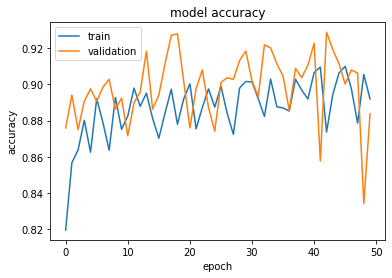

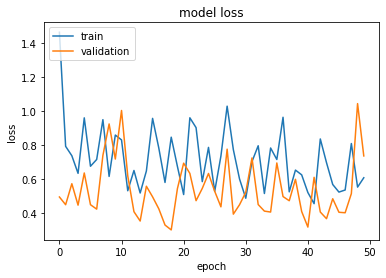

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/InceptionV3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/InceptionV3/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 


model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 50)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification/inceptionv3_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification/InceptionV3')


## **Resnet50V2**

94674944/94668760 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
146/146 [==============================] - 106s 699ms/step - loss: 3.1613 - accuracy: 0.7598 - val_loss: 0.8693 - val_accuracy: 0.8655
Epoch 2/50
146/146 [==============================] - 101s 694ms/step - loss: 1.0692 - accuracy: 0.8483 - val_loss: 0.5918 - val_accuracy: 0.9045
Epoch 3/50
146/146 [==============================] - 102s 698ms/step - loss: 0.9644 - accuracy: 0.8657 - val_loss: 0.9220 - val_accuracy: 0.8611
Epoch 4/50
146/146 [==============================] - 103s 703ms/step - loss: 1.6320 - accuracy: 0.8352 - val_loss: 0.7952 - val_accuracy: 0.8880
Epoch 5/50
146/146 [==============================] - 103s 704ms/step - loss: 0.9497 - accuracy: 0.8835 - val_loss: 0.8812 - val_accuracy: 0.8655
Epoch 6/50
146/146 [==============================] - 103s 703ms/step - loss: 0.9933 - accuracy: 0.8840 - val_loss: 0.4842 - val_accuracy: 0.9132
Epoch 7/50
146/146 [==============================] - 102s 702ms/step - loss: 1.2443 - accuracy: 0.8664 - val_loss: 0.8819 -

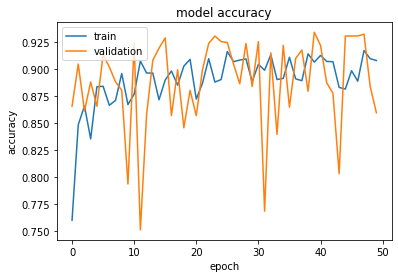

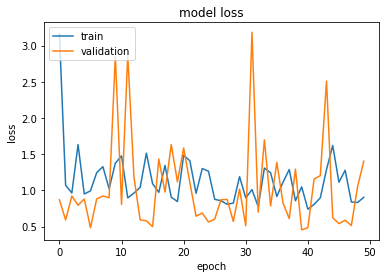

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/Resnet50V2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/Resnet50V2/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.ResNet50V2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 


model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 50)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification/resnet50v2_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification/Resnet50V2')

## **DenseNet121**

29089792/29084464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
146/146 [==============================] - 116s 745ms/step - loss: 1.0325 - accuracy: 0.7147 - val_loss: 0.3234 - val_accuracy: 0.8559
Epoch 2/50
146/146 [==============================] - 105s 722ms/step - loss: 0.3310 - accuracy: 0.8664 - val_loss: 0.2732 - val_accuracy: 0.8872
Epoch 3/50
146/146 [==============================] - 106s 728ms/step - loss: 0.2710 - accuracy: 0.8906 - val_loss: 0.2841 - val_accuracy: 0.8776
Epoch 4/50
146/146 [==============================] - 104s 716ms/step - loss: 0.2676 - accuracy: 0.8924 - val_loss: 0.3476 - val_accuracy: 0.8637
Epoch 5/50
146/146 [==============================] - 104s 715ms/step - loss: 0.2565 - accuracy: 0.8962 - val_loss: 0.2380 - val_accuracy: 0.8993
Epoch 6/50
146/146 [==============================] - 103s 709ms/step - loss: 0.2279 - accuracy: 0.9095 - val_loss: 0.2357 - val_accuracy: 0.8967
Epoch 7/50
146/146 [==============================] - 104s 710ms/step - loss: 0.2190 - accuracy: 0.9115 - val_loss: 0.2163 -

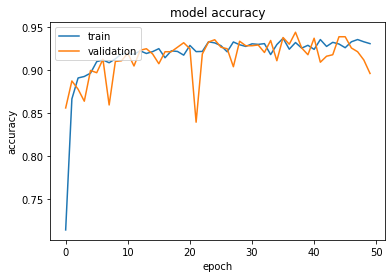

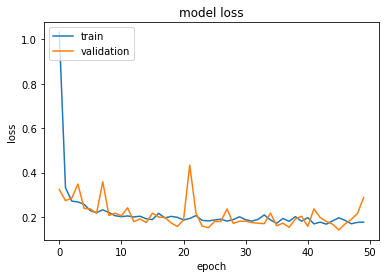

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/DenseNet121/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/DenseNet121/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.DenseNet121(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 

model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 50)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification/densenet121_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification/DenseNet121')

## **VGG19**

80142336/80134624 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
146/146 [==============================] - 108s 739ms/step - loss: 0.5732 - accuracy: 0.8285 - val_loss: 0.2617 - val_accuracy: 0.9002
Epoch 2/50
146/146 [==============================] - 107s 731ms/step - loss: 0.2681 - accuracy: 0.9009 - val_loss: 0.2460 - val_accuracy: 0.9132
Epoch 3/50
146/146 [==============================] - 106s 724ms/step - loss: 0.2205 - accuracy: 0.9188 - val_loss: 0.2166 - val_accuracy: 0.9193
Epoch 4/50
146/146 [==============================] - 125s 857ms/step - loss: 0.2116 - accuracy: 0.9254 - val_loss: 0.1849 - val_accuracy: 0.9297
Epoch 5/50
146/146 [==============================] - 105s 719ms/step - loss: 0.1831 - accuracy: 0.9343 - val_loss: 0.1940 - val_accuracy: 0.9236
Epoch 6/50
146/146 [==============================] - 105s 720ms/step - loss: 0.1811 - accuracy: 0.9327 - val_loss: 0.1927 - val_accuracy: 0.9227
Epoch 7/50
146/146 [==============================] - 105s 720ms/step - loss: 0.1660 - accuracy: 0.9416 - val_loss: 0.1900 -

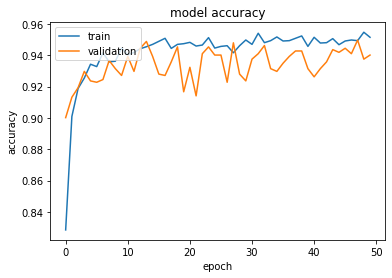

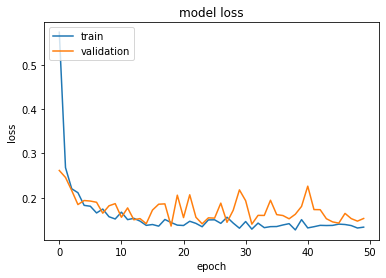

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/VGG19/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/VGG19/assets


In [ ]:
#choose model to perform transfer learning with

base_model = tf.keras.applications.VGG19(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model

model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 50)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification/vgg19_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification/VGG19')

## **VGG16**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
146/146 [==============================] - 103s 703ms/step - loss: 0.4967 - accuracy: 0.8322 - val_loss: 0.3155 - val_accuracy: 0.8828
Epoch 2/50
146/146 [==============================] - 103s 709ms/step - loss: 0.2884 - accuracy: 0.8969 - val_loss: 0.2498 - val_accuracy: 0.9036
Epoch 3/50
146/146 [==============================] - 103s 705ms/step - loss: 0.2190 - accuracy: 0.9203 - val_loss: 0.2425 - val_accuracy: 0.9132
Epoch 4/50
146/146 [==============================] - 103s 705ms/step - loss: 0.2315 - accuracy: 0.9194 - val_loss: 0.2381 - val_accuracy: 0.9071
Epoch 5/50
146/146 [==============================] - 102s 700ms/step - loss: 0.2137 - accuracy: 0.9218 - val_loss: 0.1862 - val_accuracy: 0.9358
Epoch 6/50
146/146 [==============================] - 103s 704ms/step - loss: 0.1953 - accuracy: 0.9340 - val_loss: 0.1793 - val_accuracy: 0.9201
Epoch 7/50
146/146 [==============================] - 103s 708ms/step - loss: 0.1759 - accuracy: 0.9323 - val_loss: 0.2047 -

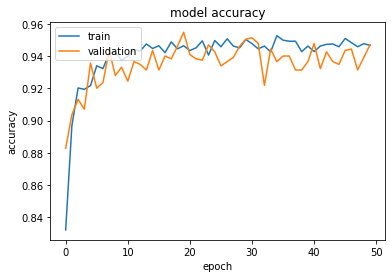

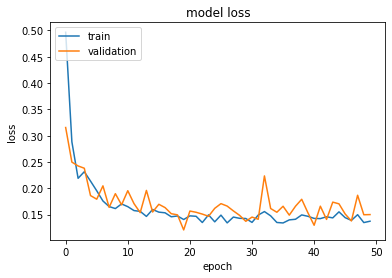

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/VGG16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Pneumonia_classification/VGG16/assets


In [ ]:



base_model = tf.keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

base_model.trainable = False


#define model 




model = tf.keras.Sequential([base_model,
                                 GlobalAveragePooling2D(),
                                 Dense(2, activation="softmax")                                     
                                ])


#training



model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',metrics='accuracy')

with tf.device('/device:GPU:0'):
  history=model.fit_generator(
  train_generator,
  steps_per_epoch = train_generator.samples // batch_size,
  validation_data = validation_generator, 
  validation_steps = validation_generator.samples // batch_size,
  epochs = 50)


#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#classification report + confusion matrix


#predictions = model.predict_classes(x_val)
#predictions = predictions.reshape(1,-1)[0]
#print(classification_report(y_val, predictions, target_names = ['NORMAL(Class 0)','PNEUMONIA(Class 1)']))
#print(confusion_matrix(y_val,predictions))

#save history
filename='/content/drive/MyDrive/Pneumonia_classification/vgg16_history.p'

with open(filename, 'wb') as f:
    pickle.dump(history.history, f)

#save model
model.save('/content/drive/MyDrive/Pneumonia_classification/VGG16')

In [ ]:
!nvidia-smi

Sun Jun 13 04:22:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     6W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------